<a href="https://colab.research.google.com/github/eshaan90/iot-analytics/blob/master/hierarchichal_clustering_iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering Analysis on IOT Data

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import openpyxl
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_csv('evkirpal.csv',header=None,names=['A','B','C'])
dataset.describe()


,A,B,C
count,774.000000,774.000000,774.000000
mean,144.422052,99.698390,19.186989
std,198.588640,115.311233,16.126314
min,0.096368,1.937400,-5.646600
25%,20.230500,38.140250,5.662700
50%,56.391500,52.209500,15.163000
75%,185.060000,110.635000,29.094750
max,1794.800000,754.840000,86.594000


In [4]:
dataset.head()

,A,B,C
0,47.4670,281.330,38.7780
1,683.6500,75.401,5.5034
2,41.3620,43.375,16.2120
3,49.6140,44.885,11.3000
4,7.2875,160.980,19.1680


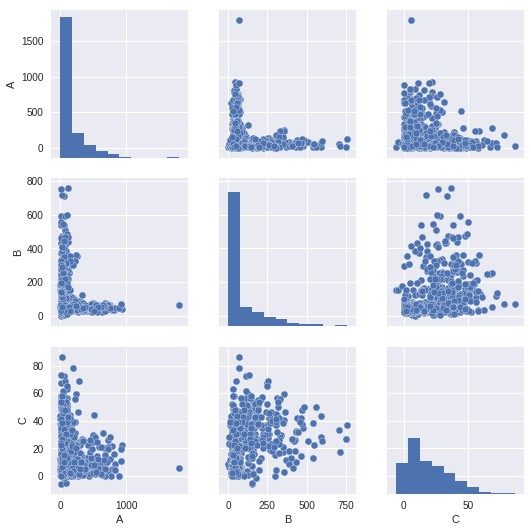

In [10]:
sns.pairplot(dataset)

In [0]:
x = dataset.A
y = dataset.B
z = dataset.C

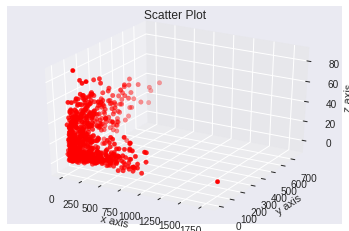

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')    
ax1.scatter(x, y, z, c='r', marker='o')
ax1.set_title("Scatter Plot")
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
plt.show()
fig.savefig('3d_Scatter_plot.png')

In [0]:
linked = linkage(dataset, 'single')

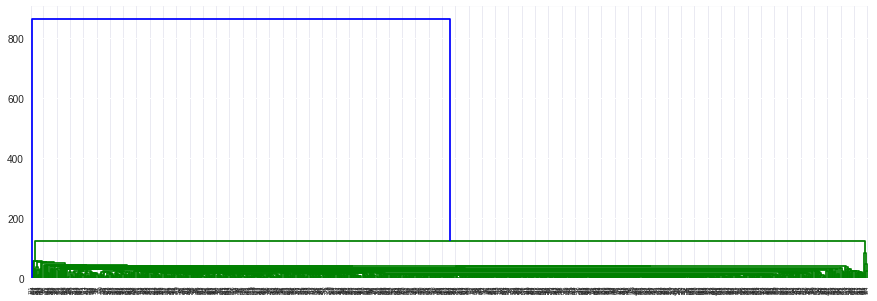

In [28]:
fig2=plt.figure(figsize=(15, 5))  
dendrogram(linked,  
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [15]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(dataset) 

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [0]:
#This is the major step to create the cluster linkages
Z = linkage(dataset,'ward','euclidean')
# print Z
c, coph_dists = cophenet(Z, pdist(dataset))
sqform = squareform(pdist(dataset))

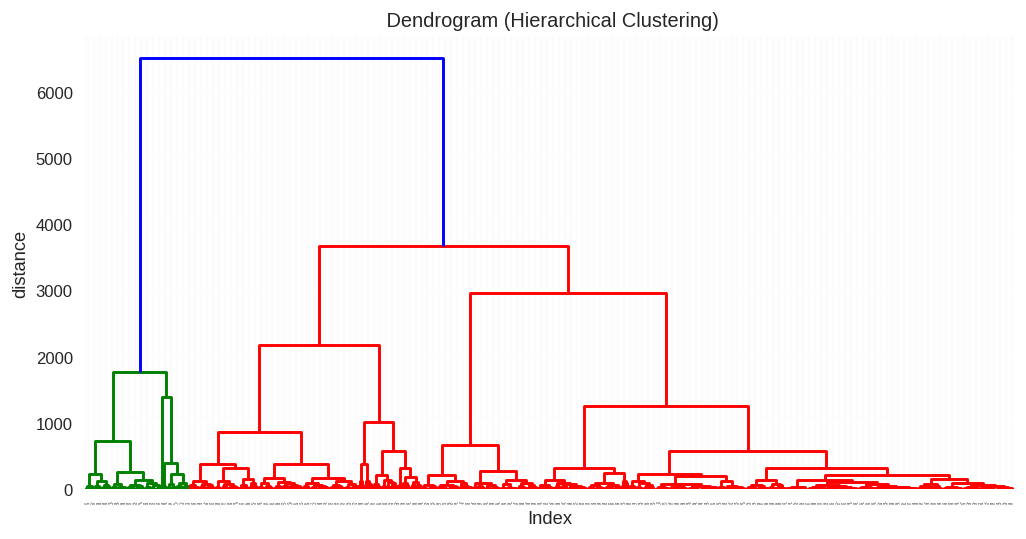

In [26]:
#calculate full dendrogram
fig2=plt.figure(figsize=(10,5), dpi=120, facecolor='white', edgecolor='green')
plt.title(" Dendrogram (Hierarchical Clustering)")
plt.xlabel("Index")
plt.ylabel("distance")
dendrogram(Z,
           leaf_rotation=90.,
           leaf_font_size=1.,
           show_leaf_counts=True,
           color_threshold= 0.7*max(Z[:,2]),#0.7*max(Z[:,2]),#This is the default vale
           no_labels=False,
           )
plt.show()
#fig2.savefig('dendogram.png')

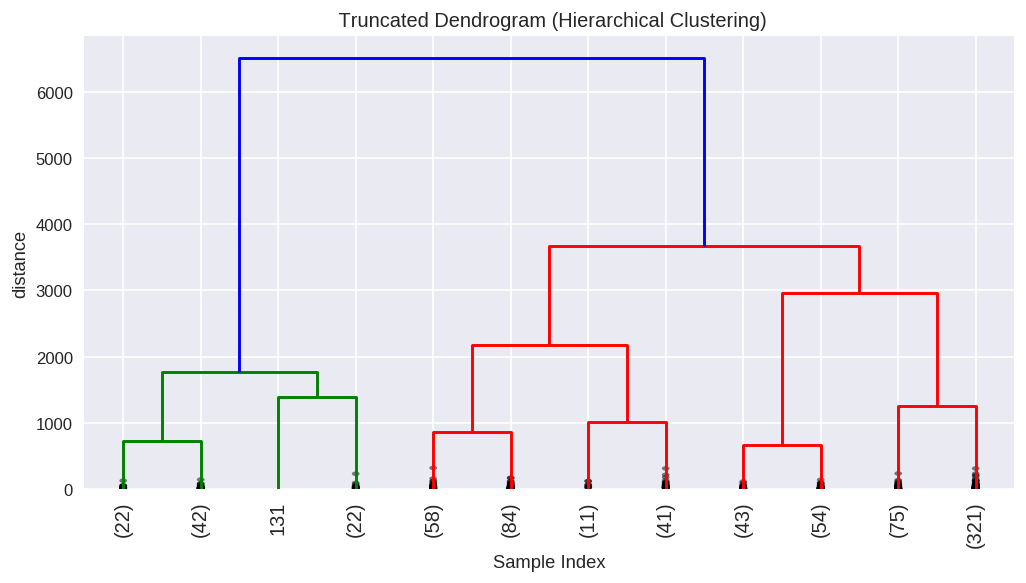

In [21]:
#show truncated dendrogram
fig3=plt.figure(figsize=(10,5), dpi=120, facecolor='white', edgecolor='green')
plt.title(" Truncated Dendrogram (Hierarchical Clustering)")
plt.xlabel("Sample Index")
plt.ylabel("distance")
dendrogram(Z,
           truncate_mode='lastp', #show only last 12 merges
           p=12, #
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_leaf_counts=True,
           color_threshold= 0.7*max(Z[:,2]),#0.7*max(Z[:,2]),#This is the default vale
           no_labels=False,
           show_contracted=True,
           )
plt.show()

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

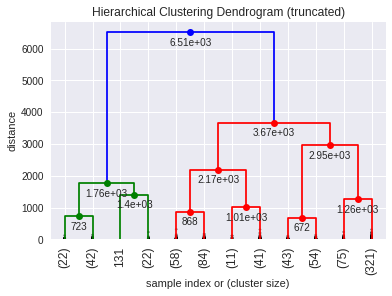

In [23]:
#Annotated dendrogram
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

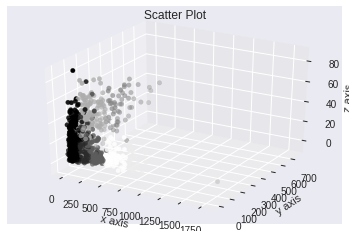

In [24]:
#find the clusters based on distance
fig = plt.figure()
max_d = 1155 #(based on average of max jump in dendrogram)
clusters = fcluster(Z, max_d, criterion='distance')
#print clusters
# plt.figure(figsize=(10, 8))
# plt.scatter(x,y,z, c=clusters, cmap='prism')  # plot points with cluster dependent colors
ax1 = fig.add_subplot(111, projection='3d')    
ax1.scatter(x,y,z,c=clusters)
ax1.set_title("Scatter Plot")
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis') 

plt.show()

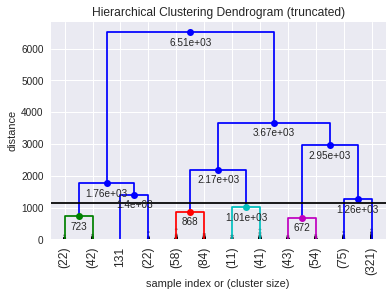

In [25]:
#dendrogram based on splitting the clusters
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()